<a href="https://colab.research.google.com/github/Dinesh8688/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/----MEGA---/train.csv")

In [2]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
import pandas as pd
test = pd.read_csv("/content/drive/MyDrive/----MEGA---/test.csv")

In [4]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [5]:
train.shape

(29451, 12)

In [6]:
test.shape

(68720, 11)

In [7]:
train.notnull().sum()

POSTED_BY                29451
UNDER_CONSTRUCTION       29451
RERA                     29451
BHK_NO.                  29451
BHK_OR_RK                29451
SQUARE_FT                29451
READY_TO_MOVE            29451
RESALE                   29451
ADDRESS                  29451
LONGITUDE                29451
LATITUDE                 29451
TARGET(PRICE_IN_LACS)    29451
dtype: int64

In [8]:
test.notnull().sum()

POSTED_BY             68720
UNDER_CONSTRUCTION    68720
RERA                  68720
BHK_NO.               68720
BHK_OR_RK             68720
SQUARE_FT             68720
READY_TO_MOVE         68720
RESALE                68720
ADDRESS               68720
LONGITUDE             68720
LATITUDE              68720
dtype: int64

In [9]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [16]:
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace('/n','_')
train.columns = train.columns.str.upper()

In [17]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [18]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [19]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [20]:
train=train.drop(["POSTED_BY","UNDER_CONSTRUCTION","RERA","BHK_OR_RK","READY_TO_MOVE","RESALE"],axis="columns",inplace=False)

In [22]:
train.columns

Index(['BHK_NO.', 'SQUARE_FT', 'ADDRESS', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [21]:
test=test.drop(["POSTED_BY","UNDER_CONSTRUCTION","RERA","BHK_OR_RK","READY_TO_MOVE","RESALE"],axis="columns",inplace=False)

In [23]:
test.columns

Index(['BHK_NO.', 'SQUARE_FT', 'ADDRESS', 'LONGITUDE', 'LATITUDE'], dtype='object')

In [25]:
# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test.ADDRESS = le.fit_transform(test.ADDRESS)
test.head()

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE
0,1,545.171340,3903,21.262000,73.047700
1,2,800.000000,6484,18.966114,73.148278
2,2,1257.096513,6092,22.592200,88.484911
3,3,1400.329489,3843,26.988300,75.584600
4,1,430.477830,4995,22.700000,72.870000


In [26]:
# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.ADDRESS = le.fit_transform(train.ADDRESS)
train.head()

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,1300.236407,2844,12.969910,77.597960,55.0
1,2,1275.000000,6576,12.274538,76.644605,51.0
2,2,933.159722,2256,12.778033,77.632191,43.0
3,2,929.921143,5095,28.642300,77.344500,62.5
4,2,999.009247,3830,22.592200,88.484911,60.5


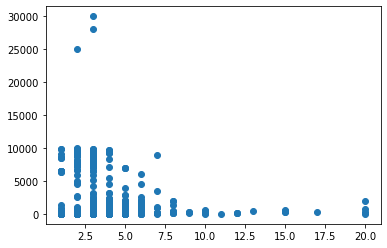

In [28]:
from matplotlib import pyplot
pyplot.scatter(train["BHK_NO."],train["TARGET(PRICE_IN_LACS)"])

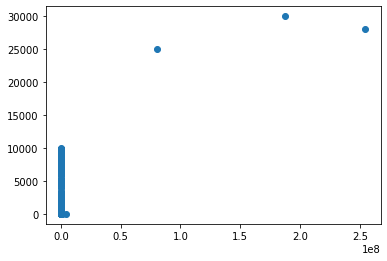

In [30]:
from matplotlib import pyplot
pyplot.scatter(train["SQUARE_FT"],train["TARGET(PRICE_IN_LACS)"])

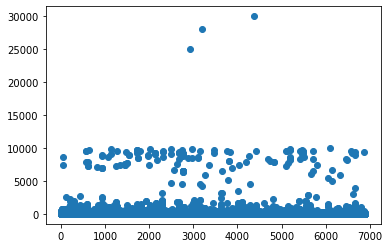

In [29]:
from matplotlib import pyplot
pyplot.scatter(train["ADDRESS"],train["TARGET(PRICE_IN_LACS)"])

In [31]:

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train[["BHK_NO."]],train[["TARGET(PRICE_IN_LACS)"]])
predicted_price=model.predict(train[["BHK_NO."]])
print(model.predict([[5]]))

[[361.68822651]]


In [32]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train[["SQUARE_FT"]],train[["TARGET(PRICE_IN_LACS)"]])
predicted_price=model.predict(train[["SQUARE_FT"]])
print(model.predict([[1000]]))

[[140.28296743]]


In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(train[["ADDRESS"]],train[["TARGET(PRICE_IN_LACS)"]])
predicted_price=model.predict(train[["ADDRESS"]])
print(model.predict([[2844]]))

[[146.64223648]]


In [34]:
x=train.drop(["TARGET(PRICE_IN_LACS)"],axis=1)
y=train["TARGET(PRICE_IN_LACS)"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
model.fit(x_train,y_train)
predicted=model.predict(x_test)
predicted

array([120.48965793, 158.839783  ,  83.41335661, ..., 200.50221331,
        62.72851011, 184.42060128])

In [37]:
model.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>